<font color = 'orange'>

# Binomial Logistic Regression

</font>

- to predict hiring decisions based on candidate features to enhance recruitment efficiency and decision making
- apply binomial logistic regression to evaluate the likelihood of a candidate's success based on various attributes such as experience, skills, and education
- improve hiring practices by providing data-driven recommendations and reducing bias in the selection process

In [68]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import sklearn.metrics as metrics
from sklearn.utils import resample

In [2]:
# load dataset
recruitment = pd.read_csv('data/recruitment_data.csv')
recruitment.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [3]:
# retrieve shape of dataset
recruitment.shape

(1500, 11)

In [4]:
# check for null values
recruitment.isna().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [5]:
# check for duplicates
recruitment.duplicated().sum()

0

In [6]:
# check for datatypes
recruitment.dtypes

Age                      int64
Gender                   int64
EducationLevel           int64
ExperienceYears          int64
PreviousCompanies        int64
DistanceFromCompany    float64
InterviewScore           int64
SkillScore               int64
PersonalityScore         int64
RecruitmentStrategy      int64
HiringDecision           int64
dtype: object

In [7]:
# retrieve descriptive stats
recruitment.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


<br><br>

## Check for outliers with boxplots

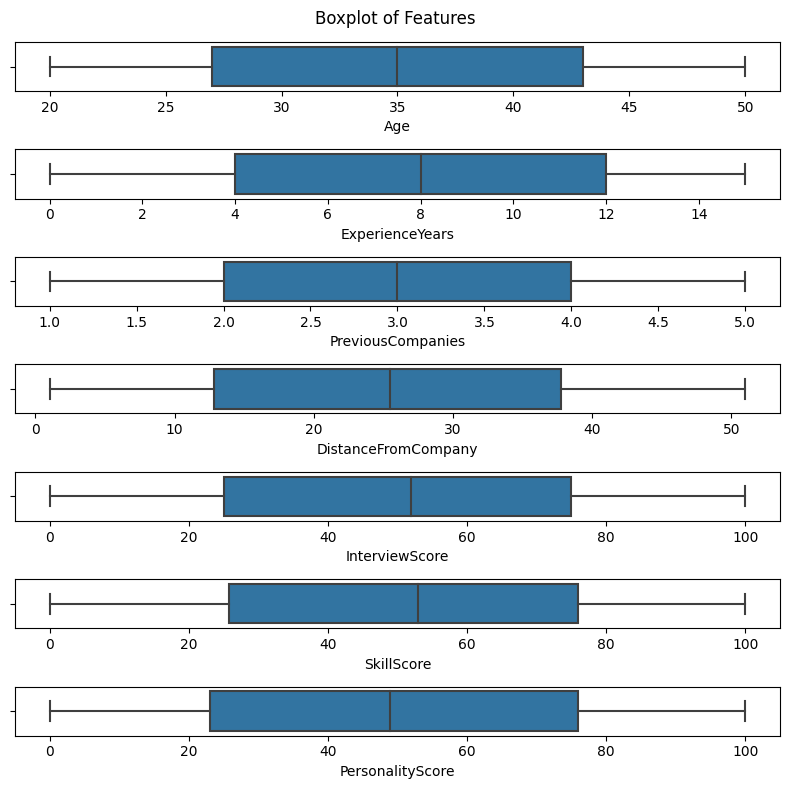

In [8]:
# plot boxplots for variables to check for anomalies visually
fig, axes = plt.subplots(7, 1, figsize=(8, 8))

sns.boxplot(x=recruitment['Age'], ax=axes[0])

sns.boxplot(x=recruitment['ExperienceYears'], ax=axes[1])

sns.boxplot(x=recruitment['PreviousCompanies'], ax=axes[2])

sns.boxplot(x=recruitment['DistanceFromCompany'], ax=axes[3])

sns.boxplot(x=recruitment['InterviewScore'], ax=axes[4])

sns.boxplot(x=recruitment['SkillScore'], ax=axes[5])

sns.boxplot(x=recruitment['PersonalityScore'], ax=axes[6])

plt.suptitle("Boxplot of Features")
plt.tight_layout()
plt.show()

- there are no outliers visually

<br><br>

## Check for multicollinearity using heatmap

In [9]:
# retrieve the correlation table for features
recruitment.drop(columns='HiringDecision').corr(numeric_only=True)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
Age,1.000000,0.011286,0.032610,0.024780,-0.032580,-0.021031,-0.025579,-0.008068,0.037727,0.018064
Gender,0.011286,1.000000,0.009676,-0.028502,-0.061915,0.003822,-0.020887,0.012333,0.023729,-0.023753
EducationLevel,0.032610,0.009676,1.000000,-0.000951,0.007367,0.020600,0.012807,-0.043367,0.031115,-0.036923
ExperienceYears,0.024780,-0.028502,-0.000951,1.000000,0.015784,0.007920,-0.051701,0.006323,0.013891,0.029603
PreviousCompanies,-0.032580,-0.061915,0.007367,0.015784,1.000000,0.009187,-0.008387,0.040883,-0.024572,-0.000466
DistanceFromCompany,-0.021031,0.003822,0.020600,0.007920,0.009187,1.000000,-0.019594,-0.016891,0.004627,-0.007315
InterviewScore,-0.025579,-0.020887,0.012807,-0.051701,-0.008387,-0.019594,1.000000,-0.004887,-0.027967,0.012004
SkillScore,-0.008068,0.012333,-0.043367,0.006323,0.040883,-0.016891,-0.004887,1.000000,-0.004266,-0.031189
PersonalityScore,0.037727,0.023729,0.031115,0.013891,-0.024572,0.004627,-0.027967,-0.004266,1.000000,0.004712
RecruitmentStrategy,0.018064,-0.023753,-0.036923,0.029603,-0.000466,-0.007315,0.012004,-0.031189,0.004712,1.000000


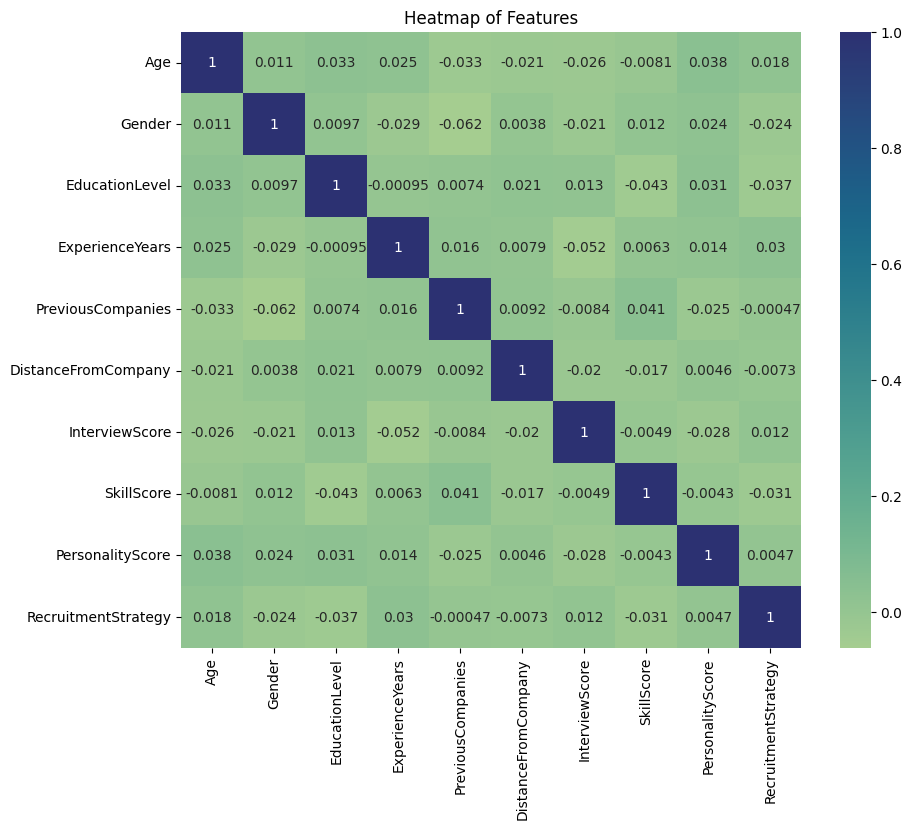

In [10]:
# plot a heatmap to visualise the correlation of the features
plt.figure(figsize=(10, 8))

sns.heatmap(recruitment.drop(columns='HiringDecision').corr(numeric_only=True), annot=True, cmap='crest')

plt.title("Heatmap of Features")
plt.show()

- visual inspection indicates negligible levels of multicollinearity

<br><br>

## Train test split dataset

In [17]:
# perform train test split
train, test = train_test_split(recruitment, train_size=0.75, stratify=recruitment['HiringDecision'], random_state=42)

<br><br>

## Check for class balance and resample if needed

In [18]:
# check for class balance in target variable
train['HiringDecision'].value_counts(normalize=True)

HiringDecision
0    0.689778
1    0.310222
Name: proportion, dtype: float64

- a 3:7 ratio is still ok, no resampling is needed

<br><br>

## Perform recursive feature elimination with cross-validation (RFECV)

In [19]:
# set target and feature variables
y_train = train['HiringDecision']
x_train = train.drop(columns='HiringDecision')

y_test = test['HiringDecision']
x_test = test.drop(columns='HiringDecision')

In [25]:
# build first iteration of model with all features
clf = LogisticRegression(random_state=42, max_iter=1000).fit(x_train, y_train)

# perform RFECV
rfecv = RFECV(estimator=clf, step=1, cv=5)
rfecv.fit(x_train, y_train)

print("optimal no. of features:", rfecv.n_features_)
print("best features:", rfecv.support_)
print("feature ranking:", rfecv.ranking_)

optimal no. of features: 9
best features: [False  True  True  True  True  True  True  True  True  True]
feature ranking: [2 1 1 1 1 1 1 1 1 1]


<br><br>

## Refit the logistic regression model with the optimal features

In [26]:
# reset feature variable
optimal_features = x_train.columns[rfecv.support_]
x_train_optimal = x_train.loc[:, optimal_features]
x_test_optimal = x_test.loc[:, optimal_features]

In [27]:
# refit logistic regression model
clf = LogisticRegression(random_state=42, max_iter=1000).fit(x_train_optimal, y_train)

<br><br>

## Evaluate model with confusion matrix, classification report and ROC curve

In [28]:
# initialise predictions and probability predictions
y_pred = clf.predict(x_test_optimal)
y_prob = clf.predict_proba(x_test_optimal)

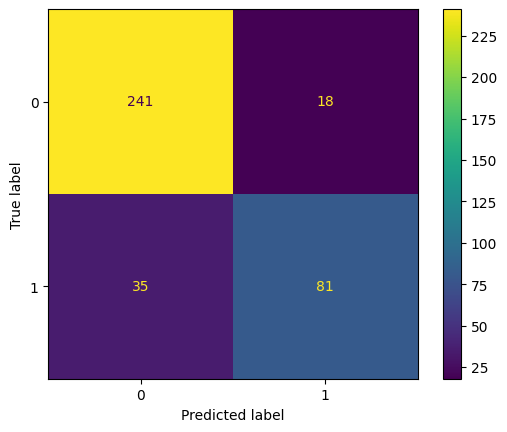

In [29]:
# plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

- confusion matrix shows decent results and accurate predictions visually

In [30]:
# retrieve classification report
target_names = list(map(str, clf.classes_))

report = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       259
           1       0.82      0.70      0.75       116

    accuracy                           0.86       375
   macro avg       0.85      0.81      0.83       375
weighted avg       0.86      0.86      0.86       375



- the model has a decent performance, with an accuracy of 86% and correctly classifies 86% of the instances
- although, the recall and f1-scores for class 1 (Candidate is hired) is decent, it is worth noting that it is significant lower than class 0 and has room for improvement

In [31]:
# retrieve model log loss
log_loss = metrics.log_loss(y_test, y_prob)
print("log loss: ", log_loss)

log loss:  0.39550489407702155


- with log loss of 0.4, the model's probability estimates are reasonably accurate
- however there's room for improvement

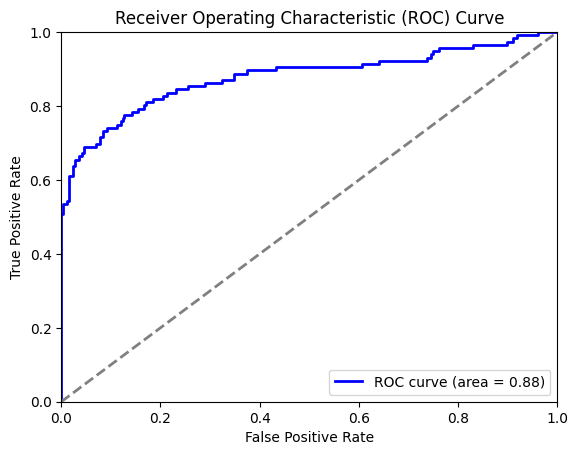

AUC: 0.8792437757954998


In [32]:
# plot the ROC curve and retrieve AUC
y_prob_positive_class = y_prob[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob_positive_class)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()
print("AUC:", roc_auc)

- AUC of 0.88 is very high and indicates that the model is excellent in distinguishing positive and negative classes
- AUC is close to 1, suggesting that model is very effective at predicting the probability of the positive class relative to the negative class

<br><br>

## Evaluate the association of features with the target variable

In [59]:
# create a dataframe of features with their respective absolute coefficients
feature_coef = pd.DataFrame(data={'feature':clf.feature_names_in_, 'coefficient':abs(clf.coef_[0])}).sort_values(by='coefficient', ascending=False).reset_index(drop=True)
feature_coef

,feature,coefficient
0,RecruitmentStrategy,2.493858
1,EducationLevel,0.990167
2,Gender,0.164651
3,PreviousCompanies,0.123555
4,ExperienceYears,0.116869
5,SkillScore,0.029556
6,InterviewScore,0.024650
7,PersonalityScore,0.023267
8,DistanceFromCompany,0.009169


- `RecruitmentStrategy` and `EducationLevel` impact the hiring decision most significantly
- current recruitment practices may have gender bias

In [78]:
# calculate the original probability and odds of candidate being hired
original_prob = recruitment['HiringDecision'].value_counts()[1] / recruitment['HiringDecision'].value_counts().sum()
original_odds = original_prob / (1 - original_prob)

# calculate the increase in odds when candidate is male 
gender_coef = feature_coef[feature_coef['feature'] == 'Gender']['coefficient'].iloc[0]
odds_increase = np.exp(gender_coef)

# calculate the new odds and probability when candidate is male
new_odds = original_odds * odds_increase
new_prob = new_odds / (1 + new_odds)

# calculate the increase in probability of candidate being hired when he is male
prob_increase = new_prob - original_prob
prob_increase

0.03627174817759227

- male candidates are 3.6% more likely to be hired than females

<br><br>

<font color = 'orange'>

## Summary

</font>

- fitted a binomial logistic regression model to predict hiring decisions by inputting certain candidate features
- resulting model has decent performance with high accuracy and AUC
- although it has decent ability to predict hired candidates, it has room for improvement as class 1 precision, recall and F1-scores are significantly lower than class 0
    - this is further supported by the model's log loss of 0.4
- future implementations of the model can help HR department streamline hiring decisions
- HR departments can enhance their recruitment practice and efficiency:
    - focusing on aggresive recruitment strategies and valuing higher education levels may improve hiring outcomes in the short term
    - consider also placing higher emphasis on candidates' past experiences, and various scores on top of education levels
    - gender bias could be an underlying issue and needs to be further analysed (statistical significance for eg) to ensure a fair and equitable hiring process 


<br><br><br><br>

# Metadata

- `Age` age of the candidate

- `Gender` gender of the candidate

    0. Male
    1. Female

- `EducationLevel` highest level of education attained by the candidate

    1. Bachelor's (Type 1)
    2. Bachelor's (Type 2)
    3. Master's
    4. PhD

- `ExperienceYears` number of years of professional experience

- `PreviousCompanies` number of previous companies where the candidate has worked

- `DistanceFromCompany` distance in kilometers from the candidate's residence to the hiring company

- `InterviewScore` score achieved by the candidate in the interview process, ranged from 0 to 100

- `SkillScore` assessment score of the candidate's technical skills, ranged from 0 to 100

- `PersonalityScore` evaluation score of the candidate's personality traits, ranged from 0 to 100

- `RecruitmentStrategy` strategy adopted by the hiring team for recruitment

    1. Aggressive
    2. Moderate
    3. Conservative

- `HiringDecision` outcome of the hiring decision

    0. Not hired
    1. Hired

<br>

# Acknowledgements
- data courtesy of Rabie El Kharoua, provided via [Predicting Hiring Decisions in Recruitment Data](https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data) on Kaggle